[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gcmatos/python-para-geociencias/blob/master/notebooks/2.2%20EDA%20Registro%20de%20Terremotos%20USGS.ipynb)

Ctrl/Cmd + click para abrir em uma nova aba do navegador web e utilizar o Google Colab para rodar o tutorial.

# Análise Exploratória de Dados
__*Registro USGS de terremotos desde 1965*__

Fonte: [https://www.kaggle.com/usgs/earthquake-database](https://www.kaggle.com/usgs/earthquake-database)

## Configuração de ambiente

### Instalação de dependências

In [ ]:
# Instalação do Basemap e dependências para dados geoespaciais
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [ ]:
# Instalar GeoPandas
!pip install shapely fiona six geopandas

### Importar bibliotecas

In [ ]:
# Matplotlib em células de códigos
%matplotlib inline

In [33]:
# Processamento
import numpy as np
import pandas as pd
from pandas import Series
import geopandas as gpd
from shapely.geometry import Point
import cartopy
import cartopy.crs as ccrs

# Visualizacao
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import seaborn as sns

# Filtrar alertas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Matplotlib style
plt.style.use('default')

### Importação dos dados
Subir o arquivo **`earthquakes-database.csv`**

In [ ]:
earthquakes = pd.read_csv("../dados/earthquakes-database.csv")

## Auditando dados

> Colunas com datas foram reconhecidas como `pandas.to_datetime` durante a importação?

> [Descrição das variáveis na USGS](https://earthquake.usgs.gov/data/comcat/data-eventterms.php)


Trata-se de uma série ou uma tabela de atributos?

In [ ]:
# earthquakes.head()
# earthquakes.sample(5)
earthquakes.tail()

Quais são os nomes (*labels*) das variáveis (colunas)?


In [ ]:
earthquakes.columns
# for i in earthquakes.columns:
#     print(i)

Resumo de informações sobre todas as variáveis presentes no dataset:

In [ ]:
earthquakes.info()

Resumo estatístico das variáveis numéricas:

In [ ]:
earthquakes.describe()

### Converter DataFrame em GeoDataFrame

Como estão distribuidos os valores nulos no data set?

In [29]:
earthquakes['geometry'] = list(zip(earthquakes.Longitude, earthquakes.Latitude))
earthquakes['geometry'] = earthquakes['geometry'].apply(Point)
earthquakes = gpd.GeoDataFrame(earthquakes, geometry='geometry')

In [30]:
earthquakes.crs = {'init' :'epsg:4326'}

### Valores nulos

Como estão distribuidos os valores nulos no data set?

In [ ]:
earthquakes.isnull().sum()

### Variáveis categóricas

Como é a distribuição das variáveis categóricas?

In [ ]:
earthquakes['Type'].value_counts()

In [ ]:
# Magnitude Type
earthquakes['Magnitude Type'].value_counts()

### Séries de tempo

As variáveis de tempo foram identificadas corretamente durante a importação?

In [ ]:
earthquakes['Date'].dtype

In [ ]:
earthquakes['Time'].dtype

É necessário transformar estas variáveis em `datetime`?

In [ ]:
earthquakes['Date'] = pd.to_datetime(earthquakes['Date'])

A variável 'Date' pode ser decomposta em uma nova variável 'Year' para realizarmos estatísticas por ano?

In [ ]:
# Criar coluna 'Year' a partir da coluna 'Date'
earthquakes['Year'] = earthquakes['Date'].dt.year

In [ ]:
# Converter a coluna 'Time' em datetime
earthquakes['Time'] = pd.to_datetime(earthquakes['Time'])

### Filtrar para visualização
Filtrar os tipos de sismos para melhor visualizar os dados.

In [ ]:
# Filtrando sismos tectônicos e geológicos
earthquakes_geo = earthquakes[earthquakes['Type'] == 'Earthquake']

In [ ]:
# Filtrar sismos nucleares
nuclear_explosion = earthquakes[earthquakes['Type'] == 'Nuclear Explosion']

## Visualização


### Pré-visualização

Se plotarmos todas as variáveis de uma só vez, a visualização seria esclarecedora?

In [ ]:
earthquakes.plot();

Podemos visualizar em apenas um gráfico todas as variáveis contínuas e suas relações para se ter um panorama das distribuições e correlações?

In [ ]:
sns.pairplot(earthquakes, diag_kind='kde', plot_kws={'alpha': 0.2});

### Distribuição de variáveis

In [ ]:
def bar_plot(data):
    series = pd.Series(data).value_counts().sort_index()
    return series.plot(kind='bar')

def line_plot(data):
    series = pd.Series(data).value_counts().sort_index()
    return series.plot()

### Distribuição de valores nulos

In [ ]:
earthquakes.isnull().sum().plot.barh();

### Variáveis contínuas

Como é o histograma de distribuição de valores de magnitude, profundidade e etc.?

In [ ]:
# Plotar histograma de Magnitude para sismos geológicos

In [ ]:
# Plotar histograma de Magnitude para sismos nucleares

In [ ]:
earthquakes['Depth Seismic Stations'].hist();

### Variação ao longo do tempo
Como é a frequência do sismos ao longo do tempo?

In [ ]:
# earthquakes_geo['Year'].value_counts().sort_index().plot()
line_plot(earthquakes_geo['Year'])
# Plot
plt.ylabel("Frequência")
plt.title("Sismos por ano")
plt.show()

Qual é o maior número de sismos?

In [ ]:
earthquakes_geo['Year'].value_counts().max()

Em qual ano se deu a maior ocorrência de terremotos?

In [ ]:
earthquakes_geo['Year'].value_counts().idxmax()

Como é a distribuição de valores discretos de magnitude de sismos?


In [ ]:
magnitudes_roundup = np.around(earthquakes["Magnitude"])
magnitudes_roundup.value_counts().sort_index().plot.bar()
plt.ylabel("Frequência")
plt.title("Magnitude")
plt.show()

Como fica a distribuição de sismos de explosões nucleares ao longo do tempo?

In [ ]:
# Plotar a variação de sismos nucleares no tmepo

### Correlações entre variáveis

Como é a distribuição de sismos por profundidade?

In [ ]:
plt.scatter(earthquakes["Magnitude"], earthquakes["Depth"])
plt.ylim(800, -50)
plt.ylabel('Depth (km)')
plt.xlabel('Magnitude')
plt.show()

### Distribuição geoespacial

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Como estão distribuídos os sismos do data set em termos de coordenadas geográficas?

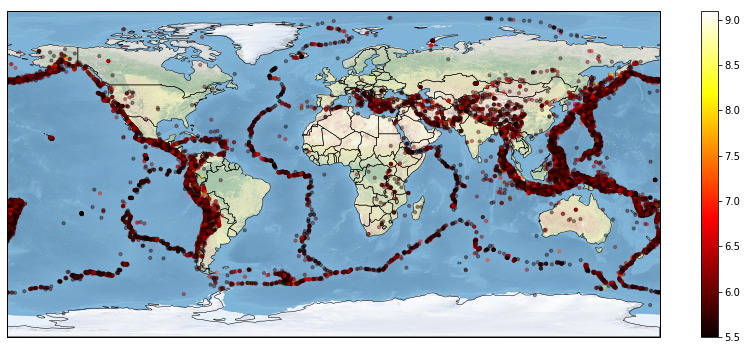

In [50]:
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
earthquakes.plot(ax=ax, column='Magnitude', markersize=10, alpha=0.4, cmap='hot', legend=True)
plt.show()

Como é a distribuição dos sismos por zonas de latitude norte, equatorial e sul?

In [ ]:
def division(data):
    
    # Split
    north_n = sum(data["Latitude"] >= 30)
    middle_n = sum(np.logical_and(data["Latitude"] < 30, data["Latitude"] > -30))
    south_n = sum(data["Latitude"] <= -30)
    
    # Sumário
    total = north_n + middle_n + south_n
    north_p = north_n / total * 100
    middle_p = middle_n / total * 100
    south_p = south_n / total * 100
    
    return [north_n, middle_n, south_n, north_p, middle_p, south_p]



In [ ]:
# Segmentar dados por zona
earthquakes_geo_split = division(earthquakes_geo)

# Criar dataframe e inserir dados de frequência
earthquakes_geo_split_df = pd.DataFrame(earthquakes_geo_split[0:3],
                                        index=['Norte', 'Equatorial', 'Sul'],
                                        columns=['Frequência (n)'])

# Inserir porcentagens no dataframe
earthquakes_geo_split_df['Porcentagem (%)'] = earthquakes_geo_split[3:]

# Visualizar
earthquakes_geo_split_df.iloc[::-1, 1].plot.barh();

Como é a distribuição de sismos a partir de 2012?

In [ ]:
# Filtrar sismos entre os anos de 2012 e 2016
last_geo = earthquakes_geo[(earthquakes_geo["Year"] >= 2012) & (earthquakes_geo["Year"] <= 2016)]

# Criar listas de lat&long
longitudes_geo = last_geo["Longitude"].tolist()
latitudes_geo = last_geo["Latitude"].tolist()

m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='l')
x, y = m(longitudes_geo, latitudes_geo)

plt.figure(figsize=(16, 24))
plt.title("Sismos (verde) entre 2012 e 2016")

m.plot(x, y, "o", markersize = 3, color = 'green')

m.drawcoastlines()
m.fillcontinents(color='gray', lake_color='aqua', alpha=0.6)
m.drawmapboundary()
m.drawcountries()

plt.show()